In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pickle
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df=pd.read_csv("/content/drive/MyDrive/Data Science/CSVs/Flank_wear_lathe.csv")
df

,Machining_Parameters,Depth_of_cut,Speed_rpm,Flank_wear
0,0.7,0.50,250,0.393513
1,0.7,0.75,500,0.467263
2,0.7,1.00,750,0.541013
3,0.7,1.25,1000,0.614763
4,0.7,1.50,1250,0.688513
...,...,...,...,...
1995,1.1,0.50,282,0.961513
1996,1.0,0.75,668,0.893263
1997,0.5,0.80,888,0.198013
1998,0.6,0.85,323,0.354763


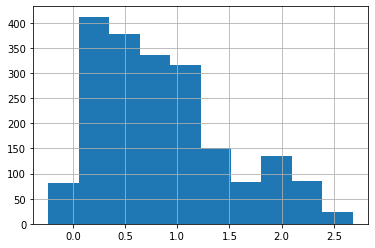

In [42]:
df['Flank_wear'].hist()

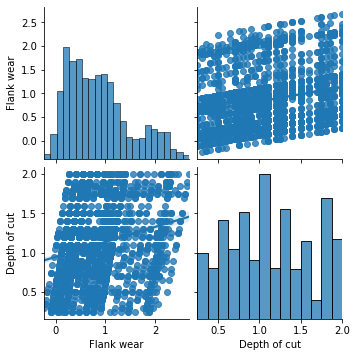

In [30]:
import seaborn as sns
cnc_df = df[['Flank_wear','Depth_of_cut']]
cnc_df.columns = ['Flank wear', 'Depth of cut']
sns.pairplot(cnc_df, kind="reg")

Text(0, 0.5, 'Machining_Parameters')

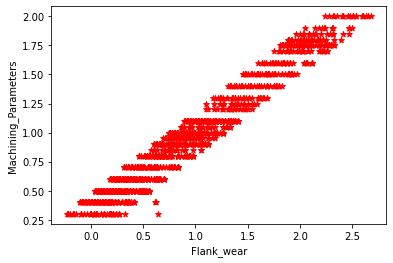

In [31]:
plt.scatter(df.Flank_wear,df.Machining_Parameters,color='r',marker='*')
plt.xlabel('Flank_wear')
plt.ylabel('Machining_Parameters')

Text(0, 0.5, 'Depth_of_cut')

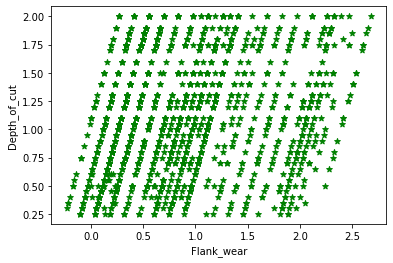

In [32]:
plt.scatter(df.Flank_wear,df.Depth_of_cut,color='g',marker='*')
plt.xlabel('Flank_wear')
plt.ylabel('Depth_of_cut')

Text(0, 0.5, 'Speed_rpm')

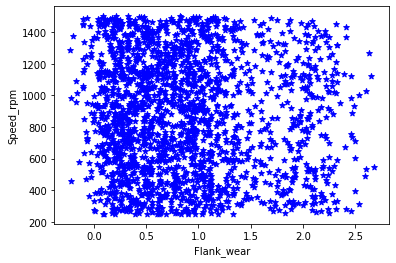

In [33]:
plt.scatter(df.Flank_wear,df.Speed_rpm,color='b',marker='*')
plt.xlabel('Flank_wear')
plt.ylabel('Speed_rpm')

In [34]:
X = df.drop('Flank_wear', axis='columns')
y = df['Flank_wear']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# **Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
r_lin = clf.score(X_test, y_test)
r_lin

0.9983285380903916

In [43]:
clf.predict([[0.73,1.57,1253.87]])

array([0.75116293])

# **Decision Tree Regressor**

In [37]:
from sklearn.tree import DecisionTreeRegressor  
DtReg = DecisionTreeRegressor(random_state = 0)
DtReg.fit(X_train, y_train)
r_dt = DtReg.score(X_test,y_test)
r_dt

0.9947958183680057

# **Random Forest**

In [38]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators = 500, random_state = 0)
RFReg.fit(X_train, y_train)
r_rf = RFReg.score(X_test,y_test)
r_rf

0.9972313267323442

# **Compasiron of Score**

In [39]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest'],
    'Score': [r_lin, r_dt, r_rf]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.998329,Linear Regression
0.997231,Random Forest
0.994796,Decision Tree Regressor


In [40]:
Pkl_CNC_lathe = "Pickle_RL_CNC_lathe.pkl"  

with open(Pkl_CNC_lathe, 'wb') as file:  
    pickle.dump(clf, file)

In [41]:
with open(Pkl_CNC_lathe, 'rb') as file:  
    Pickle_RL_CNC_lathe = pickle.load(file)

Pickle_RL_CNC_lathe

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)